## **Name: Vivek Bhimnath**

## **LGM TASK: Stock Market Prediction And Forecasting Using Stacked LSTM** 

### Importing important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv",parse_dates=["Date"],index_col="Date")
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.dtypes

Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
df.shape

(2035, 7)

### Dataset contains 2035 rows and 7 columns

In [ ]:
df.isna().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### No null values are present

In [ ]:
X=df[["Close"]]

In [ ]:
X.head(10)

,Close
Date,
2018-09-28,233.75
2018-09-27,233.25
2018-09-26,234.25
2018-09-25,236.10
2018-09-24,233.30
2018-09-21,234.60
2018-09-19,234.90
2018-09-18,235.05
2018-09-17,236.60


### Time Series Decomposition

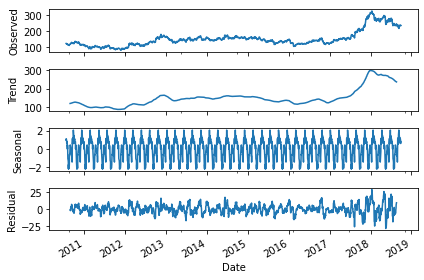

In [ ]:
from statsmodels.api import tsa
decomp=tsa.seasonal_decompose(X,freq=52)
fig=decomp.plot()

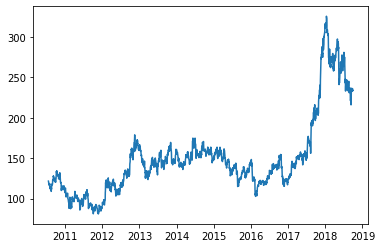

In [ ]:
plt.plot(X)

In [ ]:
#Converting data to array
Y=df["Close"].values

### Checking whether data is Stationary or not using Augmented Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(Y)
p_val=res[1]
if p_val>0.05:
  print("Not Stationary")
else:
  print("Stationary")  

Not Stationary


In [ ]:
X.shape[0]

2035

In [ ]:
size=int(X.shape[0]*0.7)
size

1424

In [ ]:
train=X.iloc[:size]
test=X.iloc[size:]

In [ ]:
print(train.shape)
print(test.shape)


(1424, 1)
(611, 1)


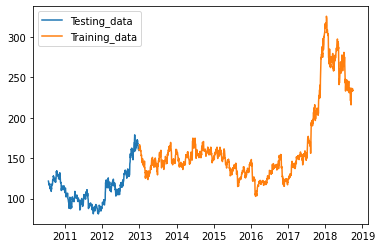

In [ ]:
plt.plot(test,label="Testing_data")
plt.plot(train,label="Training_data")
plt.legend()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms.fit(train)
sc_train=ms.transform(train)
sc_test=ms.transform(test)

### Implementing stacked LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation="relu",input_shape=(10,1)))
model.add(LSTM(100,activation="relu"))
model.add(Dense(1))
model.compile(loss="mse",optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 100)           40800     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen=TimeseriesGenerator(sc_train,sc_train,length=10,batch_size=10)

In [ ]:
model.fit_generator(gen,epochs=55,steps_per_epoch=15)

Epoch 1/55
 8/15 [===============>..............] - ETA: 0s - loss: 0.0016

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


15/15 [==============================] - 0s 15ms/step - loss: 0.0014
Epoch 2/55
15/15 [==============================] - 0s 15ms/step - loss: 5.7426e-04
Epoch 3/55
15/15 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 4/55
15/15 [==============================] - 0s 14ms/step - loss: 6.8674e-04
Epoch 5/55
15/15 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 6/55
15/15 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 7/55
15/15 [==============================] - 0s 15ms/step - loss: 5.1720e-04
Epoch 8/55
15/15 [==============================] - 0s 14ms/step - loss: 4.7500e-04
Epoch 9/55
15/15 [==============================] - 0s 15ms/step - loss: 0.0011
Epoch 10/55
15/15 [==============================] - 0s 17ms/step - loss: 8.3854e-04
Epoch 11/55
15/15 [==============================] - 0s 16ms/step - loss: 0.0011
Epoch 12/55
15/15 [==============================] - 0s 15ms/step - loss: 0.0024
Epoch 13/55
15/15 [=========

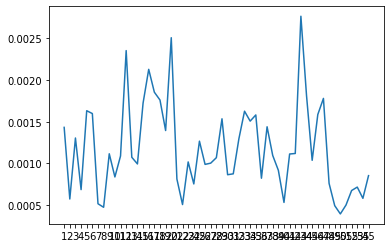

In [ ]:
loss=model.history.history['loss']
plt.plot(range(1,len(loss)+1),loss)
a=plt.xticks(range(1,len(loss)+1))

### Testing generating Time Series Data

In [ ]:
gen_test=TimeseriesGenerator(sc_test,sc_test,length=10,batch_size=1)

In [ ]:
xtest=[]
ytest=[]
for i in range(len(gen_test)):
  x,y=gen_test[i]
  xtest.append(x[0])
  ytest.append(y[0][0])

In [ ]:
xtest[0]

array([[0.25549081],
       [0.25773196],
       [0.25997311],
       [0.26086957],
       [0.27028238],
       [0.28014343],
       [0.28036755],
       [0.28238458],
       [0.2962797 ],
       [0.29314209]])

In [ ]:
pred=model.predict(gen_test)

In [ ]:
actual=ms.inverse_transform(np.array(ytest).reshape(-1, 1))
pred=ms.inverse_transform(pred)

In [ ]:
actual.shape

(601, 1)

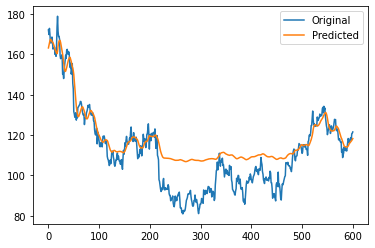

In [ ]:
plt.plot(actual,label="Original")
plt.plot(pred,label="Predicted")
plt.legend()

In [ ]:
pred.shape

(601, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(actual,pred)
print("MSE is ",mse)
rmse=np.sqrt(mse)
print("RMSE is ",rmse)

MSE is  112.98537885480329
RMSE is  10.629458069666736


## **Conclusion:**

### The dataset containing Time Series Data has various attributes Open,High,Low,Last,Close,Volume and so on. Here I have implemented Stacked LSTM on Close column and I have achieved root mean squared error of 10.62
### We can say that model is predicting good with Stacked LSTM   